In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import re
from nltk import WordNetLemmatizer

## Scraping reviews using BeautifulSoup

In [2]:
link='https://www.flipkart.com/motorola-10-5-kg-5-star-smart-wi-fi-enabled-inverter-technology-fully-automatic-front-load-in-built-heater-grey/product-reviews/itma52e4958b6324?pid=WMNFSMEABVKXCKWS&lid=LSTWMNFSMEABVKXCKWSEKRIKY&marketplace=FLIPKART&page=3'

In [3]:
## Getting reviews of first five pages
review_list=[]
dataset = []



for k in range(0,10):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})
    
    for row in reviews:

            # finding all rows within the block
            sub_row = row.find_all('div',attrs={'class':'row'})
            review = sub_row[1].find_all('div')[2].text
            review = review.strip()
            sub_row_2 = row.find_all('div',attrs={'class':'_1e9_Zu'})[0].find_all('span',attrs={'class':'_3c3Px5'})
 
    ### appending to data

            dataset.append(review)

https://www.flipkart.com/motorola-10-5-kg-5-star-smart-wi-fi-enabled-inverter-technology-fully-automatic-front-load-in-built-heater-grey/product-reviews/itma52e4958b6324?pid=WMNFSMEABVKXCKWS&lid=LSTWMNFSMEABVKXCKWSEKRIKY&marketplace=FLIPKART&page=3&pageNumber=0
https://www.flipkart.com/motorola-10-5-kg-5-star-smart-wi-fi-enabled-inverter-technology-fully-automatic-front-load-in-built-heater-grey/product-reviews/itma52e4958b6324?pid=WMNFSMEABVKXCKWS&lid=LSTWMNFSMEABVKXCKWSEKRIKY&marketplace=FLIPKART&page=3&pageNumber=1
https://www.flipkart.com/motorola-10-5-kg-5-star-smart-wi-fi-enabled-inverter-technology-fully-automatic-front-load-in-built-heater-grey/product-reviews/itma52e4958b6324?pid=WMNFSMEABVKXCKWS&lid=LSTWMNFSMEABVKXCKWSEKRIKY&marketplace=FLIPKART&page=3&pageNumber=2
https://www.flipkart.com/motorola-10-5-kg-5-star-smart-wi-fi-enabled-inverter-technology-fully-automatic-front-load-in-built-heater-grey/product-reviews/itma52e4958b6324?pid=WMNFSMEABVKXCKWS&lid=LSTWMNFSMEABVKXCKWS

In [4]:
dataset

['Very good washing machine, We like it very much,... it is very silent,  wash clothes very cleanly, gives elegant look, flipkart delivery was awesome, everything super.. thanku Motorola and flipkart....',
 'Product is very good & motors are also silent & not much vibration found when properly placed on stand with lock.If you do not lock the stand properly it will vibrate during rotation of the motor, due to not stable surface.Overall product is goof & works remotely through mobile app very well.',
 "Awesome machine made by Motorolla...It's Built like a Tank....No/Negligible Vibration feeling while Spinning....Noise levels are produced by this machine are very less....Steam Feature are also available in my machine at this price point...Almost better product than most of the other brand products available in market...Value for money....Simply Go For It...",
 'when i ordered i little bit confuded motorola and other brands like BOSH LG and  IFB but when i  used  2 months no any issue. it 

In [5]:
len(dataset)

100

In [6]:
df=pd.DataFrame({'Reviews':dataset})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"Very good washing machine, We like it very much,... it is very silent, wash clothes very cleanly, gives elegant look, flipkart delivery was awesome, everything super.. thanku Motorola and flipkart...."
1,"Product is very good & motors are also silent & not much vibration found when properly placed on stand with lock.If you do not lock the stand properly it will vibrate during rotation of the motor, due to not stable surface.Overall product is goof & works remotely through mobile app very well."
2,Awesome machine made by Motorolla...It's Built like a Tank....No/Negligible Vibration feeling while Spinning....Noise levels are produced by this machine are very less....Steam Feature are also available in my machine at this price point...Almost better product than most of the other brand products available in market...Value for money....Simply Go For It...
3,"when i ordered i little bit confuded motorola and other brands like BOSH LG and IFB but when i used 2 months no any issue. it works fine. Even its more silent my previous lg 7kg machine, Removes stains easily.There is no need to wash the coular of the shirt.its a good washing machine in the budget"
4,Product is really goodBut installation agent is not so goodHe did not know what is shipment screw in washing machineHe have not removed thatCycling got damaged it's my costlier washing machine Now it's damage😤😠😡
...,...
95,It is very worst product. Don't buy it. It creates problem a very first day. And it doesn't connect to wifi network and it doesn't take water shows E11 error. The technical people are very bad they don't know about the product.
96,Machine not working properly & flipkart is not responding properly it's just 8 days product
97,"Worst aftersales service. My machine is not working since last 1 month. have raised multiple complaints but no resolution. Would recommend that for large home appliances, one should pay little extra and make purchase from local dealership. Bad experience."
98,After 1 month of use it is showing error e11 continuously and unable to use. There is no information to get service no customer care totally irritating. Never go for this product


## Text preprocessing

In [7]:
## StopWords

import nltk
from nltk.corpus import stopwords


## Loading stopwords 
my_stopwords = stopwords.words('english')
my_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
import re


def preprocess(x):
         x=re.sub('[^a-zA-Z ]', '', x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         return x

In [9]:
df["Reviews"]=df["Reviews"].apply(preprocess)

In [10]:
df

,Reviews
0,"[good, washing, machine, like, much, silent, wash, clothes, cleanly, gives, elegant, look, flipkart, delivery, awesome, everything, super, thanku, motorola, flipkart]"
1,"[product, good, motors, also, silent, much, vibration, found, properly, placed, stand, lockif, lock, stand, properly, vibrate, rotation, motor, due, stable, surfaceoverall, product, goof, works, remotely, mobile, app, well]"
2,"[awesome, machine, made, motorollaits, built, like, tanknonegligible, vibration, feeling, spinningnoise, levels, produced, machine, lesssteam, feature, also, available, machine, price, pointalmost, better, product, brand, products, available, marketvalue, moneysimply, go]"
3,"[ordered, little, bit, confuded, motorola, brands, like, bosh, lg, ifb, used, months, issue, works, fine, even, silent, previous, lg, kg, machine, removes, stains, easilythere, need, wash, coular, shirtits, good, washing, machine, budget]"
4,"[product, really, goodbut, installation, agent, goodhe, know, shipment, screw, washing, machinehe, removed, thatcycling, got, damaged, costlier, washing, machine, damage]"
...,...
95,"[worst, product, dont, buy, creates, problem, first, day, doesnt, connect, wifi, network, doesnt, take, water, shows, e, error, technical, people, bad, dont, know, product]"
96,"[machine, working, properly, flipkart, responding, properly, days, product]"
97,"[worst, aftersales, service, machine, working, since, last, month, raised, multiple, complaints, resolution, would, recommend, large, home, appliances, one, pay, little, extra, make, purchase, local, dealership, bad, experience]"
98,"[month, use, showing, error, e, continuously, unable, use, information, get, service, customer, care, totally, irritating, never, go, product]"


In [11]:
#from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()
#df.Reviews=df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [12]:
#df

In [13]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


df.Reviews=df.Reviews.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



#tweet_elon = [lemmatizer.lemmatize(t,'v') for t in df_merge.split()]
#print(tweet_elon)

In [14]:
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem import SnowballStemmer
sn = SnowballStemmer(language='english')

In [15]:
df.Reviews=df.Reviews.apply(lambda x: [sn.stem(word) for word in x])

In [16]:
df

,Reviews
0,"[good, wash, machin, like, much, silent, wash, cloth, clean, give, eleg, look, flipkart, deliveri, awesom, everyth, super, thanku, motorola, flipkart]"
1,"[product, good, motor, also, silent, much, vibrat, found, proper, place, stand, lockif, lock, stand, proper, vibrat, rotat, motor, due, stabl, surfaceoveral, product, goof, work, remot, mobil, app, well]"
2,"[awesom, machin, made, motorollait, built, like, tanknoneglig, vibrat, feel, spinningnois, level, produc, machin, lesssteam, featur, also, avail, machin, price, pointalmost, better, product, brand, product, avail, marketvalu, moneysimpli, go]"
3,"[order, littl, bit, confud, motorola, brand, like, bosh, lg, ifb, use, month, issu, work, fine, even, silent, previous, lg, kg, machin, remov, stain, easilyther, need, wash, coular, shirtit, good, wash, machin, budget]"
4,"[product, realli, goodbut, instal, agent, goodh, know, shipment, screw, wash, machineh, remov, thatcycl, got, damag, costlier, wash, machin, damag]"
...,...
95,"[worst, product, dont, buy, creat, problem, first, day, doesnt, connect, wifi, network, doesnt, take, water, show, e, error, technic, peopl, bad, dont, know, product]"
96,"[machin, work, proper, flipkart, respond, proper, day, product]"
97,"[worst, aftersal, servic, machin, work, sinc, last, month, rais, multipl, complaint, resolut, would, recommend, larg, home, applianc, one, pay, littl, extra, make, purchas, local, dealership, bad, experi]"
98,"[month, use, show, error, e, continu, unabl, use, inform, get, servic, custom, care, total, irrit, never, go, product]"


In [17]:
df

,Reviews
0,"[good, wash, machin, like, much, silent, wash, cloth, clean, give, eleg, look, flipkart, deliveri, awesom, everyth, super, thanku, motorola, flipkart]"
1,"[product, good, motor, also, silent, much, vibrat, found, proper, place, stand, lockif, lock, stand, proper, vibrat, rotat, motor, due, stabl, surfaceoveral, product, goof, work, remot, mobil, app, well]"
2,"[awesom, machin, made, motorollait, built, like, tanknoneglig, vibrat, feel, spinningnois, level, produc, machin, lesssteam, featur, also, avail, machin, price, pointalmost, better, product, brand, product, avail, marketvalu, moneysimpli, go]"
3,"[order, littl, bit, confud, motorola, brand, like, bosh, lg, ifb, use, month, issu, work, fine, even, silent, previous, lg, kg, machin, remov, stain, easilyther, need, wash, coular, shirtit, good, wash, machin, budget]"
4,"[product, realli, goodbut, instal, agent, goodh, know, shipment, screw, wash, machineh, remov, thatcycl, got, damag, costlier, wash, machin, damag]"
...,...
95,"[worst, product, dont, buy, creat, problem, first, day, doesnt, connect, wifi, network, doesnt, take, water, show, e, error, technic, peopl, bad, dont, know, product]"
96,"[machin, work, proper, flipkart, respond, proper, day, product]"
97,"[worst, aftersal, servic, machin, work, sinc, last, month, rais, multipl, complaint, resolut, would, recommend, larg, home, applianc, one, pay, littl, extra, make, purchas, local, dealership, bad, experi]"
98,"[month, use, show, error, e, continu, unabl, use, inform, get, servic, custom, care, total, irrit, never, go, product]"


In [18]:
df.Reviews=df.Reviews.apply(lambda x: " ".join(x))
df

,Reviews
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag
...,...
95,worst product dont buy creat problem first day doesnt connect wifi network doesnt take water show e error technic peopl bad dont know product
96,machin work proper flipkart respond proper day product
97,worst aftersal servic machin work sinc last month rais multipl complaint resolut would recommend larg home applianc one pay littl extra make purchas local dealership bad experi
98,month use show error e continu unabl use inform get servic custom care total irrit never go product


## Sentiment Analysis Using Vader

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen = SentimentIntensityAnalyzer()

In [20]:
def sentiment_score(text):
    score=sen.polarity_scores(text)
    return score['compound']

In [21]:
df['sentiment_score'] = df['Reviews'].apply(lambda x:sentiment_score(x))


In [22]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,sentiment_score
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart,0.9001
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well,0.6124
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go,0.6597
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget,0.7351
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag,-0.1027


In [23]:
## Defining function to assign sentiment category based on sentiment scores
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))


In [25]:
df.head()

,Reviews,sentiment_score,sentiment
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart,0.9001,Positive
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well,0.6124,Positive
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go,0.6597,Positive
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget,0.7351,Positive
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag,-0.1027,Neutral


In [26]:
## calculating the categories of sentiments and their counts
df['sentiment'].value_counts()

Positive    40
Neutral     40
Negative    20
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

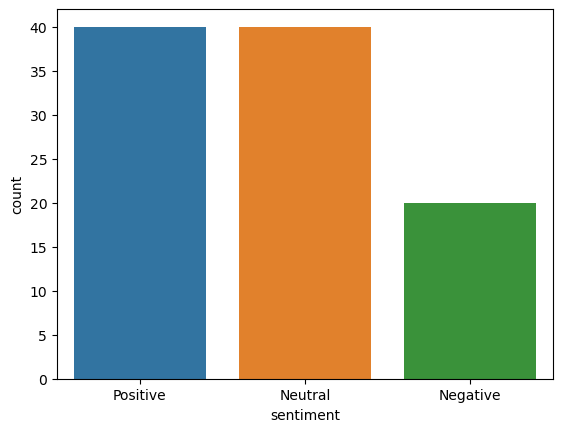

In [27]:
sns.countplot(x=df['sentiment'])

In [28]:
df

,Reviews,sentiment_score,sentiment
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart,0.9001,Positive
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well,0.6124,Positive
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go,0.6597,Positive
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget,0.7351,Positive
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag,-0.1027,Neutral
...,...,...,...
95,worst product dont buy creat problem first day doesnt connect wifi network doesnt take water show e error technic peopl bad dont know product,-0.8419,Negative
96,machin work proper flipkart respond proper day product,0.0000,Neutral
97,worst aftersal servic machin work sinc last month rais multipl complaint resolut would recommend larg home applianc one pay littl extra make purchas local dealership bad experi,-0.8271,Negative
98,month use show error e continu unabl use inform get servic custom care total irrit never go product,0.1280,Neutral


# Lets try to fit a model using BOW & TD-IDF ( additional checking)

In [29]:
df1=df.copy()

In [30]:
df1.drop("sentiment_score",inplace=True,axis=1)
df1

,Reviews,sentiment
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart,Positive
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well,Positive
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go,Positive
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget,Positive
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag,Neutral
...,...,...
95,worst product dont buy creat problem first day doesnt connect wifi network doesnt take water show e error technic peopl bad dont know product,Negative
96,machin work proper flipkart respond proper day product,Neutral
97,worst aftersal servic machin work sinc last month rais multipl complaint resolut would recommend larg home applianc one pay littl extra make purchas local dealership bad experi,Negative
98,month use show error e continu unabl use inform get servic custom care total irrit never go product,Neutral


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df1.sentiment= encoder.fit_transform(df1["sentiment"])

In [32]:
df1

,Reviews,sentiment
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart,2
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well,2
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go,2
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget,2
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag,1
...,...,...
95,worst product dont buy creat problem first day doesnt connect wifi network doesnt take water show e error technic peopl bad dont know product,0
96,machin work proper flipkart respond proper day product,1
97,worst aftersal servic machin work sinc last month rais multipl complaint resolut would recommend larg home applianc one pay littl extra make purchas local dealership bad experi,0
98,month use show error e continu unabl use inform get servic custom care total irrit never go product,1


In [33]:
# Creating the Bag of Words model 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()#(max_features = 1500)  
  
# X contains corpus (dependent variable) 

X = cv.fit_transform(df1.Reviews.values).toarray()  
X=pd.DataFrame(X,columns=cv.get_feature_names())

/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
X

,afford,aftersal,agent,almost,also,app,applianc,avail,awesom,bad,...,unabl,use,vibrat,wash,water,well,wifi,work,worst,would
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,2,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,1
98,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, df1.sentiment, test_size = 0.3) 

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
import statsmodels.api as sm

In [37]:
models=[DecisionTreeClassifier(),LogisticRegression()]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_test_pred))

DecisionTreeClassifier() accuracy :: 1.0
LogisticRegression() accuracy :: 1.0


# With TF-IDF 

In [38]:
# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = TfidfVectorizer()#(max_features = 1500)  
  
# X contains corpus (dependent variable) 

x = cv.fit_transform(df1.Reviews.values).toarray()  
x=pd.DataFrame(X,columns=cv.get_feature_names())

/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
x

,afford,aftersal,agent,almost,also,app,applianc,avail,awesom,bad,...,unabl,use,vibrat,wash,water,well,wifi,work,worst,would
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,2,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,1
98,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, df1.sentiment, test_size = 0.3) 

In [41]:
models1=[DecisionTreeClassifier(),LogisticRegression()]
for model in models1:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_test_pred))

DecisionTreeClassifier() accuracy :: 1.0
LogisticRegression() accuracy :: 1.0


In [42]:
df1

,Reviews,sentiment
0,good wash machin like much silent wash cloth clean give eleg look flipkart deliveri awesom everyth super thanku motorola flipkart,2
1,product good motor also silent much vibrat found proper place stand lockif lock stand proper vibrat rotat motor due stabl surfaceoveral product goof work remot mobil app well,2
2,awesom machin made motorollait built like tanknoneglig vibrat feel spinningnois level produc machin lesssteam featur also avail machin price pointalmost better product brand product avail marketvalu moneysimpli go,2
3,order littl bit confud motorola brand like bosh lg ifb use month issu work fine even silent previous lg kg machin remov stain easilyther need wash coular shirtit good wash machin budget,2
4,product realli goodbut instal agent goodh know shipment screw wash machineh remov thatcycl got damag costlier wash machin damag,1
...,...,...
95,worst product dont buy creat problem first day doesnt connect wifi network doesnt take water show e error technic peopl bad dont know product,0
96,machin work proper flipkart respond proper day product,1
97,worst aftersal servic machin work sinc last month rais multipl complaint resolut would recommend larg home applianc one pay littl extra make purchas local dealership bad experi,0
98,month use show error e continu unabl use inform get servic custom care total irrit never go product,1


# ROC Curve 

In [43]:
y= df1.sentiment

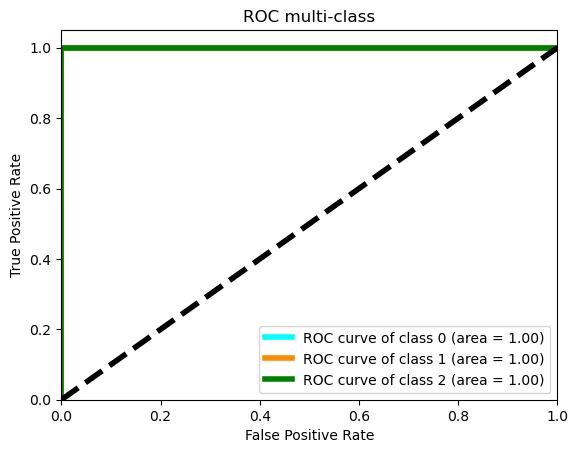

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle

#Since this is a multiclass we are going to use one vs rest 


# One Vs Rest

#For each classifier, the class is fitted against all the other classes. (only n_classes classifiers are needed)
# advantage of this approach is its interpretability. Since each class is represented by one and one 
#classifier only,gains knowledge about any particular class by inspecting its corresponding classifier. 

#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# average it and compute AUC
mean_tpr /= n_classes


# Plot  ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC multi-class')
plt.legend(loc="lower right")
plt.show()

## As accuracy for all classes are 100% the above graph contains  all the classes